In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [7]:
exp_name = "exp_synthetic"
exp_number = "different_lr_itter_1500"
base_path = "/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness"
data_path = base_path + "/my_code/Bayesian-fairness/data"


# get results

In [91]:
lr = 0.01
results_path = base_path + f"/my_code/Bayesian-fairness/results/bayesian_fairness/continuous/{exp_name}/{exp_number}/lr_{lr}"


In [92]:
def merge_results(results_path):
    subfolders = [f.path for f in os.scandir(results_path) if (f.is_dir()) & ("plots" not in f.split("/")[-1]) ]

    bootstrap_results = []
    marginal_results = []
    for run_path in subfolders:
        bootstrap_results += [pd.read_csv(run_path+ "/bootstrap_results.csv")]
        marginal_results += [pd.read_csv(run_path+ "/marginal_results.csv")]

    save_name = results_path + "/boostrap_results_all.csv"
    pd.concat(bootstrap_results,
              keys=[f"run_{i}" for i in range(len(bootstrap_results))], axis=1).to_csv(save_name)

    save_name = results_path + "/marginal_results_all.csv"
    pd.concat(marginal_results,
              keys=[f"run_{i}" for i in range(len(marginal_results))], axis=1).to_csv(save_name)


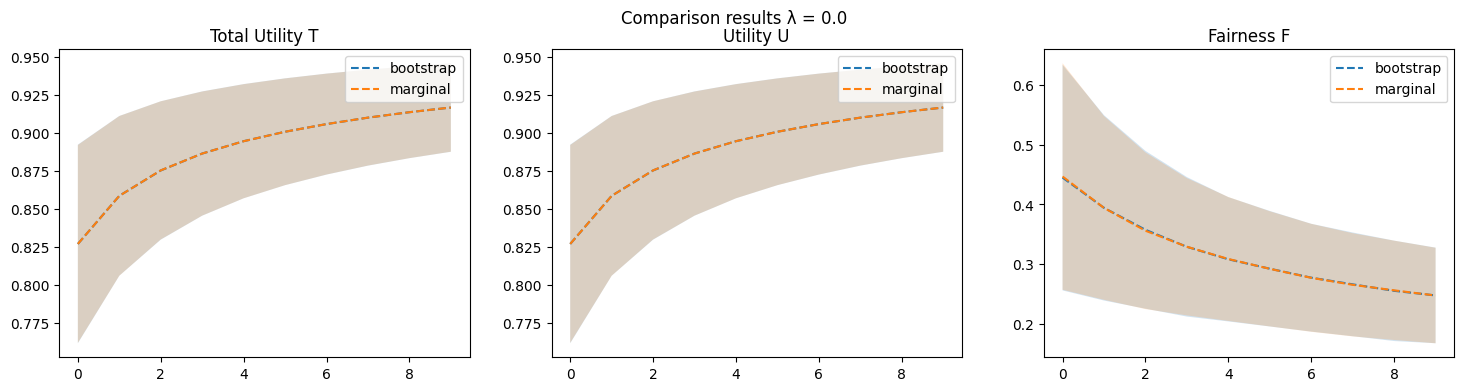

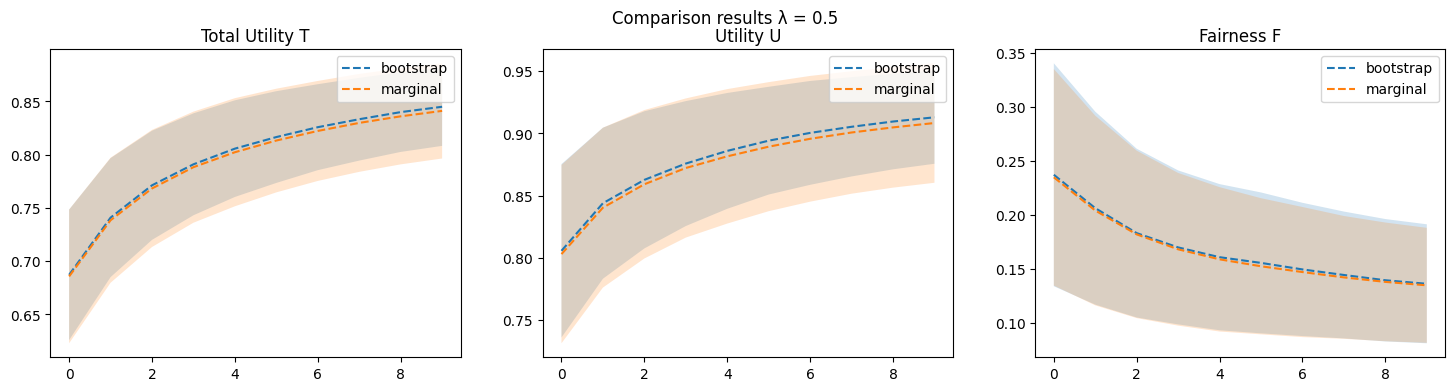

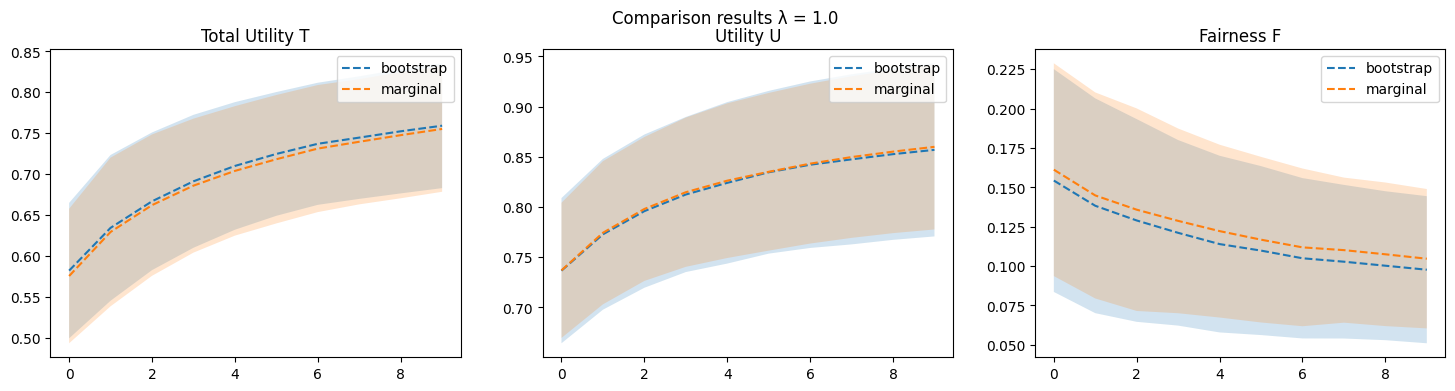

In [93]:
lambda_params = [0.0, 0.5, 0.1]
subfolders = [f.path for f in os.scandir(results_path) if (f.is_dir()) & ("plots" not in f.path.split("/")[-1]) ]

results = {}
for l in [0.0, 0.5, 1.0]:
    bootstrap_results = []
    marginal_results = []
    runs = []
    for run_path in subfolders:
        run = int(run_path.split("/")[-1])
        runs += [f"run_{run}"] 
        bootstrap_results += [pd.read_csv(run_path + f"/l_{l}/boostrap_results_all.csv", header=[1],index_col=[0])]
        marginal_results += [pd.read_csv(run_path + f"/l_{l}/marginal_results_all.csv", header=[1],index_col=[0])]
    
    results[f"l_{l}"] = {}
    results[f"l_{l}"]["bootstrap_results"] = pd.concat(bootstrap_results, keys =runs, axis= 1)
    results[f"l_{l}"]["marginal_results"] = pd.concat(marginal_results, keys =runs, axis= 1)
    
    eval_fainress = average_metric(bootstrap_data=results[f"l_{l}"]["bootstrap_results"],
                                    marginal_data=results[f"l_{l}"]["marginal_results"],
                                    metric = "eval_fairness_loss",
                                    runs=runs)
    eval_utility = average_metric(bootstrap_data=results[f"l_{l}"]["bootstrap_results"],
                                    marginal_data=results[f"l_{l}"]["marginal_results"],
                                    metric = "eval_utility",
                                    runs=runs)
    eval_loss = average_metric(bootstrap_data=results[f"l_{l}"]["bootstrap_results"],
                                    marginal_data=results[f"l_{l}"]["marginal_results"],
                                    metric = "eval_loss",
                                    runs=runs)

    subplots_comparison(eval_loss, eval_utility, eval_fainress, save_path = results_path )

In [57]:
def get_metrics_from_multi_columns(data, metric_name, runs):
    metrics_columns = [(f"run_{r}", metric_name ) for r in runs]
    data_metric = data[metrics_columns]
    data_metric.columns = [metric_name + f"_{i}" for i in runs]
    return data_metric

In [66]:
def average_metric(bootstrap_data, marginal_data, metric, runs):
    boostrap_loss = get_metrics_from_multi_columns(data = bootstrap_data, 
                                                   metric_name=metric,
                                                   runs = range(len(runs)))
    
    marginal_loss = get_metrics_from_multi_columns(data = marginal_data, 
                                                   metric_name=metric,
                                                   runs = range(len(runs)))

    bootstrap_mean, bootstrap_std = boostrap_loss.mean(axis=1), boostrap_loss.std(axis=1)
    marginal_mean, marginal_std = marginal_loss.mean(axis=1), marginal_loss.std(axis=1)
    all_results = {
        "bootstrap_mean":bootstrap_mean,
        "bootstrap_std":bootstrap_std,
        "marginal_mean":marginal_mean,
        "marginal_std":marginal_std,

    }
    all_results = pd.DataFrame(all_results)
    return all_results

In [68]:
results[f"l_{l}"]["bootstrap_results"]

run_61                                                                \
  fairness_loss   utility      loss eval_fairness_loss eval_utility eval_loss   
0      0.933331  0.734340 -0.734340           0.762575     0.729421  0.729421   
1      0.759183  0.751419 -0.751419           0.598246     0.767120  0.767120   
2      0.595465  0.809554 -0.809554           0.447659     0.788303  0.788303   
3      0.514835  0.792905 -0.792905           0.488105     0.800748  0.800748   
4      0.456290  0.806864 -0.806864           0.384419     0.813628  0.813628   
5      0.415541  0.811769 -0.811769           0.374822     0.822929  0.822929   
6      0.395266  0.816978 -0.816978           0.308121     0.830434  0.830434   
7      0.323977  0.841700 -0.841700           0.305326     0.837224  0.837224   
8      0.380888  0.819755 -0.819755           0.291596     0.843150  0.843150   
9      0.316225  0.845226 -0.845226           0.291013     0.848352  0.848352   

         run_95                                         ...    run_22  \
  fairness_loss   utility      loss eval_fairness_loss  ...      loss   
0      0.654840  0.894339 -0.894339           0.452394  ... -0.905867   
1      0.528356  0.897915 -0.897915           0.430376  ... -0.907141   
2      0.407690  0.921919 -0.921919           0.413100  ... -0.927159   
3      0.446730  0.901504 -0.901504           0.400696  ... -0.942081   
4      0.369099  0.931250 -0.931250           0.389183  ... -0.922222   
5      0.426786  0.913909 -0.913909           0.377975  ... -0.926565   
6      0.323993  0.943989 -0.943989           0.367681  ... -0.935913   
7      0.393238  0.919732 -0.919732           0.356550  ... -0.935689   
8      0.386016  0.927286 -0.927286           0.344963  ... -0.944377   
9      0.369226  0.922266 -0.922266           0.334641  ... -0.942602   

                                                   run_25                      \
  eval_fairness_loss eval_utility eval_loss fairness_loss   utility      loss   
0           0.512791     0.873817  0.873817      0.765576  0.847573 -0.847573   
1           0.478614     0.895162  0.895162      0.505041  0.903954 -0.903954   
2           0.464619     0.905107  0.905107      0.554995  0.901623 -0.901623   
3           0.450768     0.911331  0.911331      0.471078  0.908136 -0.908136   
4           0.441345     0.915791  0.915791      0.370037  0.915879 -0.915879   
5           0.431219     0.919254  0.919254      0.330939  0.931714 -0.931714   
6           0.423879     0.922031  0.922031      0.313464  0.928288 -0.928288   
7           0.413107     0.924654  0.924654      0.306827  0.932110 -0.932110   
8           0.404412     0.926855  0.926855      0.272857  0.941358 -0.941358   
9           0.394041     0.928909  0.928909      0.272444  0.935166 -0.935166   

                                             
  eval_fairness_loss eval_utility eval_loss  
0           0.350648     0.864604  0.864604  
1           0.344388     0.888741  0.888741  
2           0.340811     0.900880  0.900880  
3           0.321948     0.908800  0.908800  
4           0.305949     0.914596  0.914596  
5           0.293196     0.919181  0.919181  
6           0.280253     0.922518  0.922518  
7           0.269372     0.925449  0.925449  
8           0.259075     0.927953  0.927953  
9           0.248018     0.930258  0.930258  

[10 rows x 600 columns]

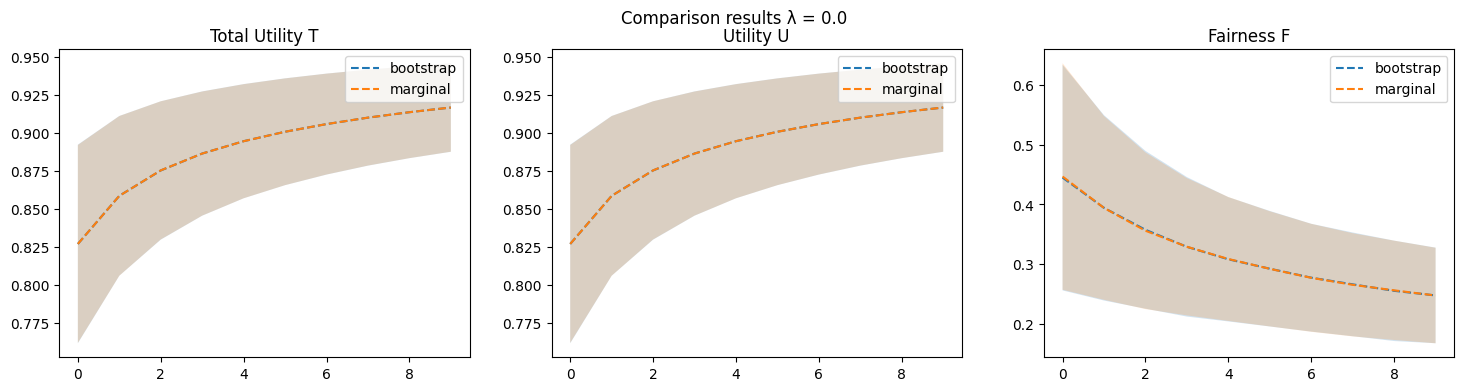

In [76]:
eval_fainress = average_metric(bootstrap_data=results[f"l_{l}"]["bootstrap_results"],
                                    marginal_data=results[f"l_{l}"]["marginal_results"],
                                    metric = "eval_fairness_loss",
                                    runs=runs)
eval_utility = average_metric(bootstrap_data=results[f"l_{l}"]["bootstrap_results"],
                                    marginal_data=results[f"l_{l}"]["marginal_results"],
                                    metric = "eval_utility",
                                    runs=runs)
eval_loss = average_metric(bootstrap_data=results[f"l_{l}"]["bootstrap_results"],
                                    marginal_data=results[f"l_{l}"]["marginal_results"],
                                    metric = "eval_loss",
                                    runs=runs)

subplots_comparison(eval_loss, eval_utility, eval_fainress )

In [73]:
subplots_comparison(eval_loss, eval_utility, eval_fainress, save_path= results_path )

,bootstrap_mean,bootstrap_std,marginal_mean,marginal_std
0,0.444857,0.189117,0.446695,0.189866
1,0.394133,0.155366,0.394010,0.154020
2,0.357409,0.132261,0.355816,0.131350
3,0.328835,0.116957,0.328923,0.115095
4,0.307929,0.104176,0.308457,0.103902
5,0.292138,0.096893,0.291940,0.096514
6,0.277121,0.090378,0.276877,0.090490
7,0.265938,0.086964,0.265151,0.086536
8,0.255049,0.084171,0.255902,0.083258
9,0.247354,0.080178,0.247199,0.080074


# Plots

In [3]:
metric_symbol = {"Total Utility": "T",
                 "Utility": "U",
                 "Fairness": "F"}
runs = range(10)

In [4]:
l_exp = "l_0.5"
bootstrap_results = pd.read_csv(results_path + f"/{l_exp}/boostrap_results_all.csv",header=[0, 1],index_col=[0])
marginal_results = pd.read_csv(results_path + f"/{l_exp}/marginal_results_all.csv",header=[0, 1],index_col=[0])

In [5]:
def get_metrics_from_multi_columns(data, metric_name, runs):
    metrics_columns = [(f"run_{r}", metric_name ) for r in runs]
    data_metric = data[metrics_columns]
    data_metric.columns = [metric_name + f"_{i}" for i in runs]
    return data_metric

In [6]:
boostrap_loss = get_metrics_from_multi_columns(data=bootstrap_results, metric_name = "eval_loss", runs=runs)
marginal_loss = get_metrics_from_multi_columns(data=marginal_results, metric_name = "eval_loss", runs=runs)
bootstrap_mean, bootstrap_std = boostrap_loss.mean(axis=1), boostrap_loss.std(axis=1)
marginal_mean, marginal_std = marginal_loss.mean(axis=1), marginal_loss.std(axis=1)
all_results = {
    "bootstrap_mean":bootstrap_mean,
    "bootstrap_std":bootstrap_std,
    "marginal_mean":marginal_mean,
    "marginal_std":marginal_std,
    
}
all_results = pd.DataFrame(all_results)

In [7]:
def plot_metric(all_results,metric, l ):
    plt.figure()
    x = range(all_results["bootstrap_mean"].shape[0])
    plt.plot(x, all_results["bootstrap_mean"],"--")
    plt.fill_between(x = x,
                     y1 = (all_results["bootstrap_mean"]-all_results["bootstrap_std"]).values,
                     y2 = (all_results["bootstrap_mean"]+all_results["bootstrap_std"]).values,
                     alpha = 0.2)

    plt.plot(x, all_results["marginal_mean"],"--")
    plt.fill_between(x = x,
                     y1 = (all_results["marginal_mean"]-all_results["marginal_std"]).values,
                     y2 = (all_results["marginal_mean"]+all_results["marginal_std"]).values,
                     alpha = 0.2)
    plt.xlabel("t")
    plt.ylabel(metric_symbol[metric])
    plt.title(f"{metric}, λ= {l}")
    plt.show()
    plt.close()


KeyError: 'Balance'

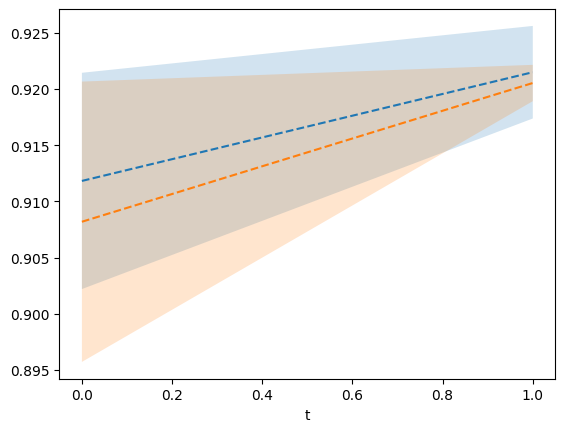

In [8]:
plot_metric(all_results = all_results, metric="Balance",  l= 0)

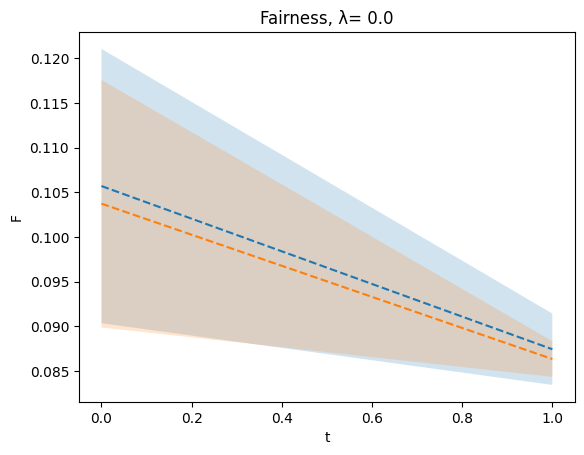

FileNotFoundError: [Errno 2] No such file or directory: '/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness/my_code/Bayesian-fairness/results/bayesian_fairness/continuous/exp_synthetic/test_1/0/l_0.1/boostrap_results_all.csv'

In [9]:
for l in [0.0, 0.1, 0.2, 0.3, 0.4]:
    bootstrap_results = pd.read_csv(results_path + f"/l_{l}/boostrap_results_all.csv",header=[0, 1],index_col=[0])
    marginal_results = pd.read_csv(results_path + f"/l_{l}/marginal_results_all.csv",header=[0, 1],index_col=[0])
    
    boostrap_loss = get_metrics_from_multi_columns(data=bootstrap_results,
                                                   metric_name = "eval_fairness_loss",
                                                   runs=range(10))
    
    marginal_loss = get_metrics_from_multi_columns(data=marginal_results,
                                                   metric_name = "eval_fairness_loss",
                                                   runs=runs)
    
    bootstrap_mean, bootstrap_std = boostrap_loss.mean(axis=1), boostrap_loss.std(axis=1)
    marginal_mean, marginal_std = marginal_loss.mean(axis=1), marginal_loss.std(axis=1)
    all_results = {
        "bootstrap_mean":bootstrap_mean,
        "bootstrap_std":bootstrap_std,
        "marginal_mean":marginal_mean,
        "marginal_std":marginal_std,

    }
    all_results = pd.DataFrame(all_results)

    plot_metric(all_results = all_results, metric="Fairness",  l= l)

In [10]:
def results_metrics(marginal_results,bootstrap_results, metric_name, runs):
    boostrap_loss = get_metrics_from_multi_columns(data=bootstrap_results,
                                                   metric_name = metric_name,
                                                   runs=runs)

    marginal_loss = get_metrics_from_multi_columns(data=marginal_results,
                                                   metric_name = metric_name,
                                                   runs=runs)
    bootstrap_mean, bootstrap_std = boostrap_loss.mean(axis=1), boostrap_loss.std(axis=1)
    marginal_mean, marginal_std = marginal_loss.mean(axis=1), marginal_loss.std(axis=1)
    all_results = {
        f"bootstrap_mean":bootstrap_mean,
        f"bootstrap_std":bootstrap_std,
        f"marginal_mean":marginal_mean,
        f"marginal_std":marginal_std,

    }
    return pd.DataFrame(all_results)

In [11]:

def subplots_comparison(eval_loss,eval_utility,eval_fainress,save_path):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))

    # plot total
    ax1.plot(range(eval_loss.shape[0]), eval_loss["bootstrap_mean"],"--", label = "bootstrap")
    ax1.fill_between(x = range(eval_loss.shape[0]),
                     y1 = (eval_loss["bootstrap_mean"]-eval_loss["bootstrap_std"]).values,
                     y2 = (eval_loss["bootstrap_mean"]+eval_loss["bootstrap_std"]).values,
                     alpha = 0.2)
    ax1.plot(range(eval_loss.shape[0]), eval_loss["marginal_mean"],"--", label = "marginal")
    ax1.fill_between(x = range(eval_loss.shape[0]),
                     y1 = (eval_loss["marginal_mean"]-eval_loss["marginal_std"]).values,
                     y2 = (eval_loss["marginal_mean"]+eval_loss["marginal_std"]).values,
                     alpha = 0.2)
    ax1.set_title("Total Utility T")
    ax1.set(xlabel='t', ylabel='T')
    ax1.legend()

    # plot utility
    ax2.plot(range(eval_utility.shape[0]), eval_utility["bootstrap_mean"],"--", label = "bootstrap")
    ax2.fill_between(x = range(eval_utility.shape[0]),
                     y1 = (eval_utility["bootstrap_mean"]-eval_utility["bootstrap_std"]).values,
                     y2 = (eval_utility["bootstrap_mean"]+eval_utility["bootstrap_std"]).values,
                     alpha = 0.2)
    ax2.plot(range(eval_utility.shape[0]), eval_utility["marginal_mean"],"--", label = "marginal")
    ax2.fill_between(x = range(eval_utility.shape[0]),
                     y1 = (eval_utility["marginal_mean"]-eval_utility["marginal_std"]).values,
                     y2 = (eval_utility["marginal_mean"]+eval_utility["marginal_std"]).values,
                     alpha = 0.2)
    ax2.set_title("Utility U")
    ax2.set(xlabel='t', ylabel='U')
    ax2.legend()

    # fairness
    ax3.plot(range(eval_fainress.shape[0]), eval_fainress["bootstrap_mean"],"--", label = "bootstrap")
    ax3.fill_between(x = range(eval_fainress.shape[0]),
                     y1 = (eval_fainress["bootstrap_mean"]-eval_fainress["bootstrap_std"]).values,
                     y2 = (eval_fainress["bootstrap_mean"]+eval_fainress["bootstrap_std"]).values,
                     alpha = 0.2)
    ax3.plot(range(eval_fainress.shape[0]), eval_fainress["marginal_mean"],"--", label = "marginal")
    ax3.fill_between(x = range(eval_fainress.shape[0]),
                     y1 = (eval_fainress["marginal_mean"]-eval_fainress["marginal_std"]).values,
                     y2 = (eval_fainress["marginal_mean"]+eval_fainress["marginal_std"]).values,
                     alpha = 0.2)
    ax3.set_title("Fairness F")
    ax3.set(xlabel='t', ylabel='F')
    ax3.legend()
    fig.suptitle(f"Comparison results λ = {l}")
    
    fig.savefig(save_path + f"/plots/comparison_subplots_{l}.png")
    plt.show()
    plt.close()


In [74]:

def subplots_comparison(eval_loss,eval_utility,eval_fainress,save_path=None):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))

    # plot total
    x = range(eval_loss["bootstrap_mean"].shape[0])
    ax1.plot(x, eval_loss["bootstrap_mean"],"--", label = "bootstrap")
    ax1.fill_between(x = x,
                     y1 = (eval_loss["bootstrap_mean"]-eval_loss["bootstrap_std"]).values,
                     y2 = (eval_loss["bootstrap_mean"]+eval_loss["bootstrap_std"]).values,
                     alpha = 0.2)
    ax1.plot(x, eval_loss["marginal_mean"],"--", label = "marginal")
    ax1.fill_between(x = x,
                     y1 = (eval_loss["marginal_mean"]-eval_loss["marginal_std"]).values,
                     y2 = (eval_loss["marginal_mean"]+eval_loss["marginal_std"]).values,
                     alpha = 0.2)
    ax1.set_title("Total Utility T")
    ax1.legend()

    # plot utility
    ax2.plot(x, eval_utility["bootstrap_mean"],"--", label = "bootstrap")
    ax2.fill_between(x = x,
                     y1 = (eval_utility["bootstrap_mean"]-eval_utility["bootstrap_std"]).values,
                     y2 = (eval_utility["bootstrap_mean"]+eval_utility["bootstrap_std"]).values,
                     alpha = 0.2)
    ax2.plot(x, eval_utility["marginal_mean"],"--", label = "marginal")
    ax2.fill_between(x = x,
                     y1 = (eval_utility["marginal_mean"]-eval_utility["marginal_std"]).values,
                     y2 = (eval_utility["marginal_mean"]+eval_utility["marginal_std"]).values,
                     alpha = 0.2)
    ax2.set_title("Utility U")
    ax2.legend()

    # fairness
    ax3.plot(x, eval_fainress["bootstrap_mean"],"--", label = "bootstrap")
    ax3.fill_between(x = x,
                     y1 = (eval_fainress["bootstrap_mean"]-eval_fainress["bootstrap_std"]).values,
                     y2 = (eval_fainress["bootstrap_mean"]+eval_fainress["bootstrap_std"]).values,
                     alpha = 0.2)
    ax3.plot(x, eval_fainress["marginal_mean"],"--", label = "marginal")
    ax3.fill_between(x = x,
                     y1 = (eval_fainress["marginal_mean"]-eval_fainress["marginal_std"]).values,
                     y2 = (eval_fainress["marginal_mean"]+eval_fainress["marginal_std"]).values,
                     alpha = 0.2)
    ax3.set_title("Fairness F")
    ax3.legend()
    fig.suptitle(f"Comparison results λ = {l}")
    if save_path:
        fig.savefig(save_path + f"/plots/comparison_subplots_{l}.png")
    plt.show()
    plt.close()


In [13]:
boostrap_loss = get_metrics_from_multi_columns(data=marginal_results,
                                                   metric_name = "eval_utility",
                                                   runs=runs)

In [14]:
mean = boostrap_loss.mean(axis=1)
std = boostrap_loss.std(axis=1)

In [15]:
y1 = (mean-std).values
y2 = (mean+std).values

<Figure size 640x480 with 0 Axes>

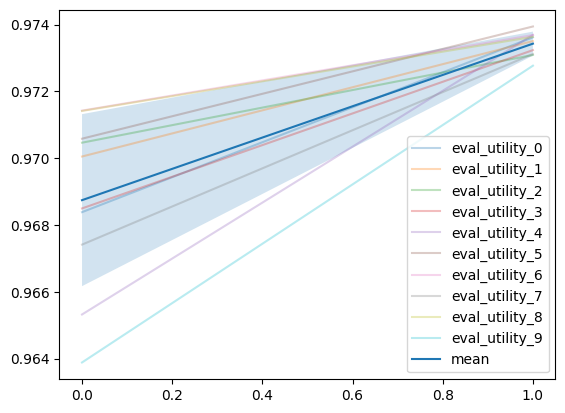

In [16]:
x = range(mean.shape[0])
plt.figure()
boostrap_loss.plot(alpha = 0.3)
plt.plot(x, mean,label="mean")
plt.fill_between(x = x,
                 y1 = y1,
                 y2 = y2,
                 alpha = 0.2)
plt.legend()

In [17]:
boostrap_loss.sample(frac=1, replace=False).reset_index(drop=True)

,eval_utility_0,eval_utility_1,eval_utility_2,eval_utility_3,eval_utility_4,eval_utility_5,eval_utility_6,eval_utility_7,eval_utility_8,eval_utility_9
0,0.973618,0.973506,0.973090,0.973236,0.973693,0.973943,0.973685,0.973120,0.973633,0.972770
1,0.968386,0.970051,0.970465,0.968497,0.965322,0.970584,0.971425,0.967414,0.971415,0.963886


In [18]:
ls = [0.0, 0.5, 1.0]

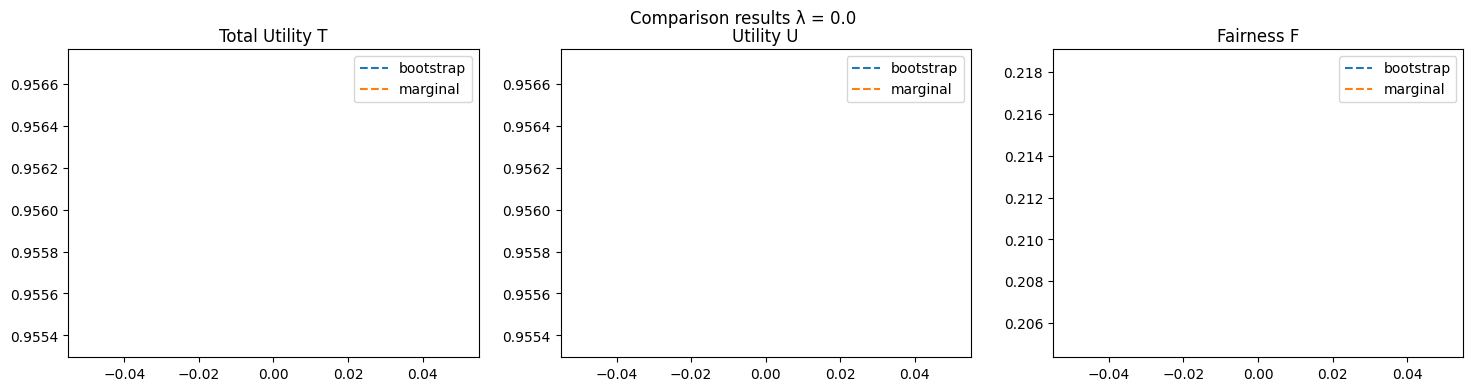

FileNotFoundError: [Errno 2] No such file or directory: '/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness/my_code/Bayesian-fairness/results/bayesian_fairness/continuous/exp_synthetic/test_2_no_steps/0/l_0.5/boostrap_results_all.csv'

In [24]:
runs = range(10) 
for l in ls :
    bootstrap_results = pd.read_csv(results_path + f"/l_{l}/boostrap_results_all.csv",header=[0, 1],index_col=[0])
    marginal_results = pd.read_csv(results_path + f"/l_{l}/marginal_results_all.csv",header=[0, 1],index_col=[0])
    
    eval_loss = results_metrics(bootstrap_results=bootstrap_results,
                                marginal_results=marginal_results,
                                metric_name="eval_loss",
                                runs=runs)


    eval_utility = results_metrics(bootstrap_results=bootstrap_results,
                                    marginal_results=marginal_results,
                                    metric_name="eval_utility",
                                    runs=runs)

    eval_fainress = results_metrics(bootstrap_results=bootstrap_results,
                                    marginal_results=marginal_results,
                                    metric_name="eval_fairness_loss",
                                    runs=runs)

    subplots_comparison(eval_loss, eval_utility, eval_fainress, save_path= results_path )

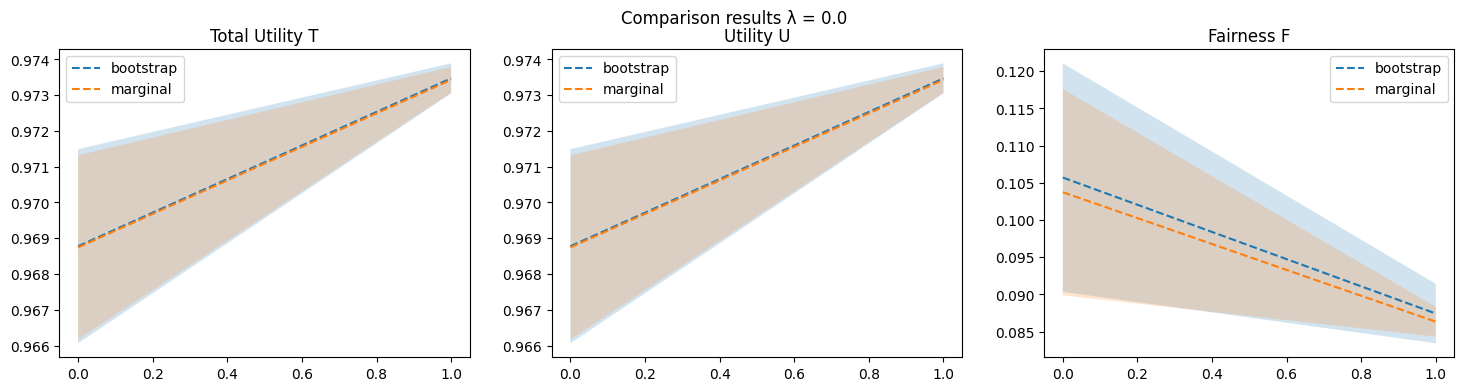

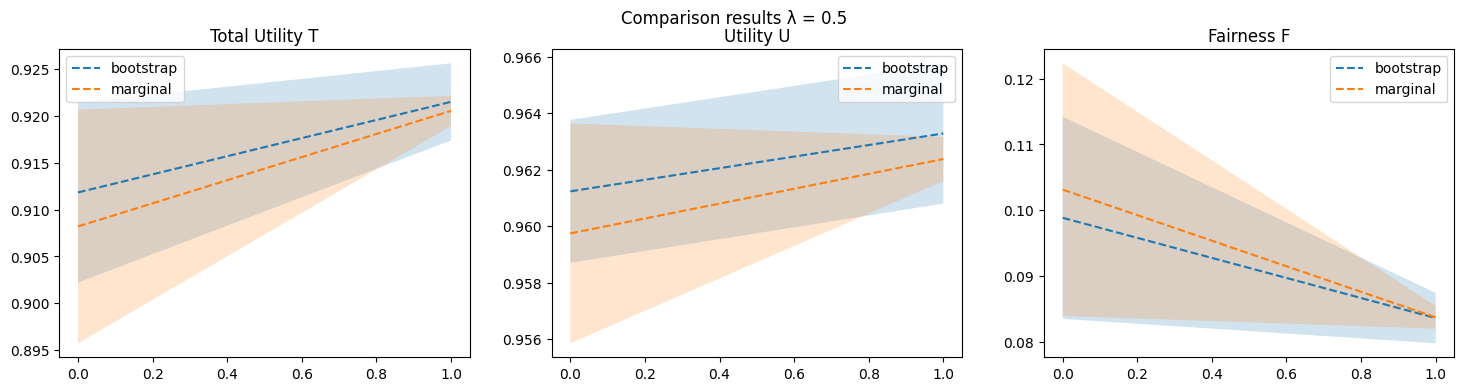

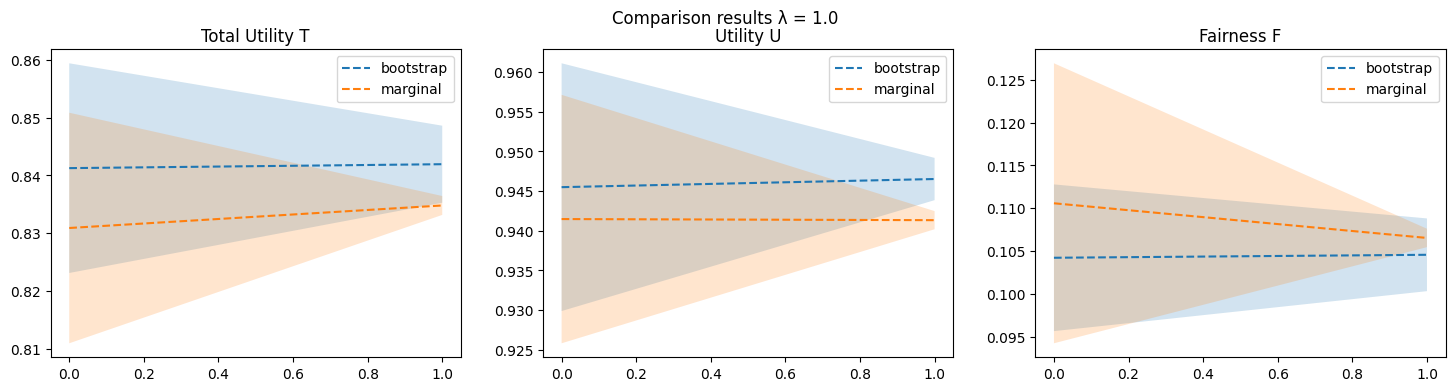

In [19]:
runs = range(10) 
for l in ls :
    bootstrap_results = pd.read_csv(results_path + f"/l_{l}/boostrap_results_all.csv",header=[0, 1],index_col=[0])
    marginal_results = pd.read_csv(results_path + f"/l_{l}/marginal_results_all.csv",header=[0, 1],index_col=[0])
    
    eval_loss = results_metrics(bootstrap_results=bootstrap_results,
                                marginal_results=marginal_results,
                                metric_name="eval_loss",
                                runs=runs)


    eval_utility = results_metrics(bootstrap_results=bootstrap_results,
                                    marginal_results=marginal_results,
                                    metric_name="eval_utility",
                                    runs=runs)

    eval_fainress = results_metrics(bootstrap_results=bootstrap_results,
                                    marginal_results=marginal_results,
                                    metric_name="eval_fairness_loss",
                                    runs=runs)

    subplots_comparison(eval_loss, eval_utility, eval_fainress, save_path= results_path )

In [37]:
eval_fainress

,bootstrap_mean,bootstrap_std,marginal_mean,marginal_std
0,0.085484,0.031134,0.092916,0.033372
1,0.059072,0.026116,0.072575,0.031157
2,0.050599,0.024830,0.063328,0.031026
3,0.047350,0.023702,0.060653,0.033654
4,0.043873,0.022310,0.059092,0.032500
5,0.041005,0.021391,0.057188,0.032369
6,0.040350,0.021621,0.056376,0.031522
7,0.039186,0.020664,0.054765,0.029826
8,0.038308,0.021306,0.053026,0.028687
9,0.037488,0.018831,0.052489,0.028836


In [ ]:
[0.0,0.5,1.0]

In [38]:
plt.rcParams.update({'font.size': 12})

In [41]:
exp_name = "exp_compass_seq_tests"
exp_number = "test_2_lr_01_iter_1500_adam"
base_path = "/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness"
results_path = base_path + f"/my_code/Bayesian-fairness/results/bayesian_fairness/continuous/{exp_name}/{exp_number}"

In [42]:
runs = range(10)
l_results = []
ls = [0.0]
for l in ls :
    bootstrap_results = pd.read_csv(results_path + f"/l_{l}/boostrap_results_all.csv",header=[0, 1],index_col=[0])
    marginal_results = pd.read_csv(results_path + f"/l_{l}/marginal_results_all.csv",header=[0, 1],index_col=[0])
    
    eval_loss = results_metrics(bootstrap_results=bootstrap_results,
                                marginal_results=marginal_results,
                                metric_name="eval_loss",
                                runs=runs)


    eval_utility = results_metrics(bootstrap_results=bootstrap_results,
                                    marginal_results=marginal_results,
                                    metric_name="eval_utility",
                                    runs=runs)

    eval_fainress = results_metrics(bootstrap_results=bootstrap_results,
                                    marginal_results=marginal_results,
                                    metric_name="eval_fairness_loss",
                                    runs=runs)
    l_results += [[eval_loss,eval_utility,eval_fainress]]

In [43]:
exp_name = "seq_exp_compass_hyperparameter_tuning"
exp_number = "adam_lr_0.01_iter_1500_s_True"
results_path = base_path + f"/my_code/Bayesian-fairness/results/bayesian_fairness/continuous/{exp_name}/{exp_number}"

In [44]:
runs = range(75)
ls = [ 0.8, 1.0]
for l in ls :
    bootstrap_results = pd.read_csv(results_path + f"/l_{l}/boostrap_results_all.csv",header=[0, 1],index_col=[0])
    marginal_results = pd.read_csv(results_path + f"/l_{l}/marginal_results_all.csv",header=[0, 1],index_col=[0])
    
    eval_loss = results_metrics(bootstrap_results=bootstrap_results,
                                marginal_results=marginal_results,
                                metric_name="eval_loss",
                                runs=runs)


    eval_utility = results_metrics(bootstrap_results=bootstrap_results,
                                    marginal_results=marginal_results,
                                    metric_name="eval_utility",
                                    runs=runs)

    eval_fainress = results_metrics(bootstrap_results=bootstrap_results,
                                    marginal_results=marginal_results,
                                    metric_name="eval_fairness_loss",
                                    runs=runs)
    l_results += [[eval_loss,eval_utility,eval_fainress]]

In [49]:
len(l_results)

3

In [50]:
ls = [0.0,0.8,1.0]

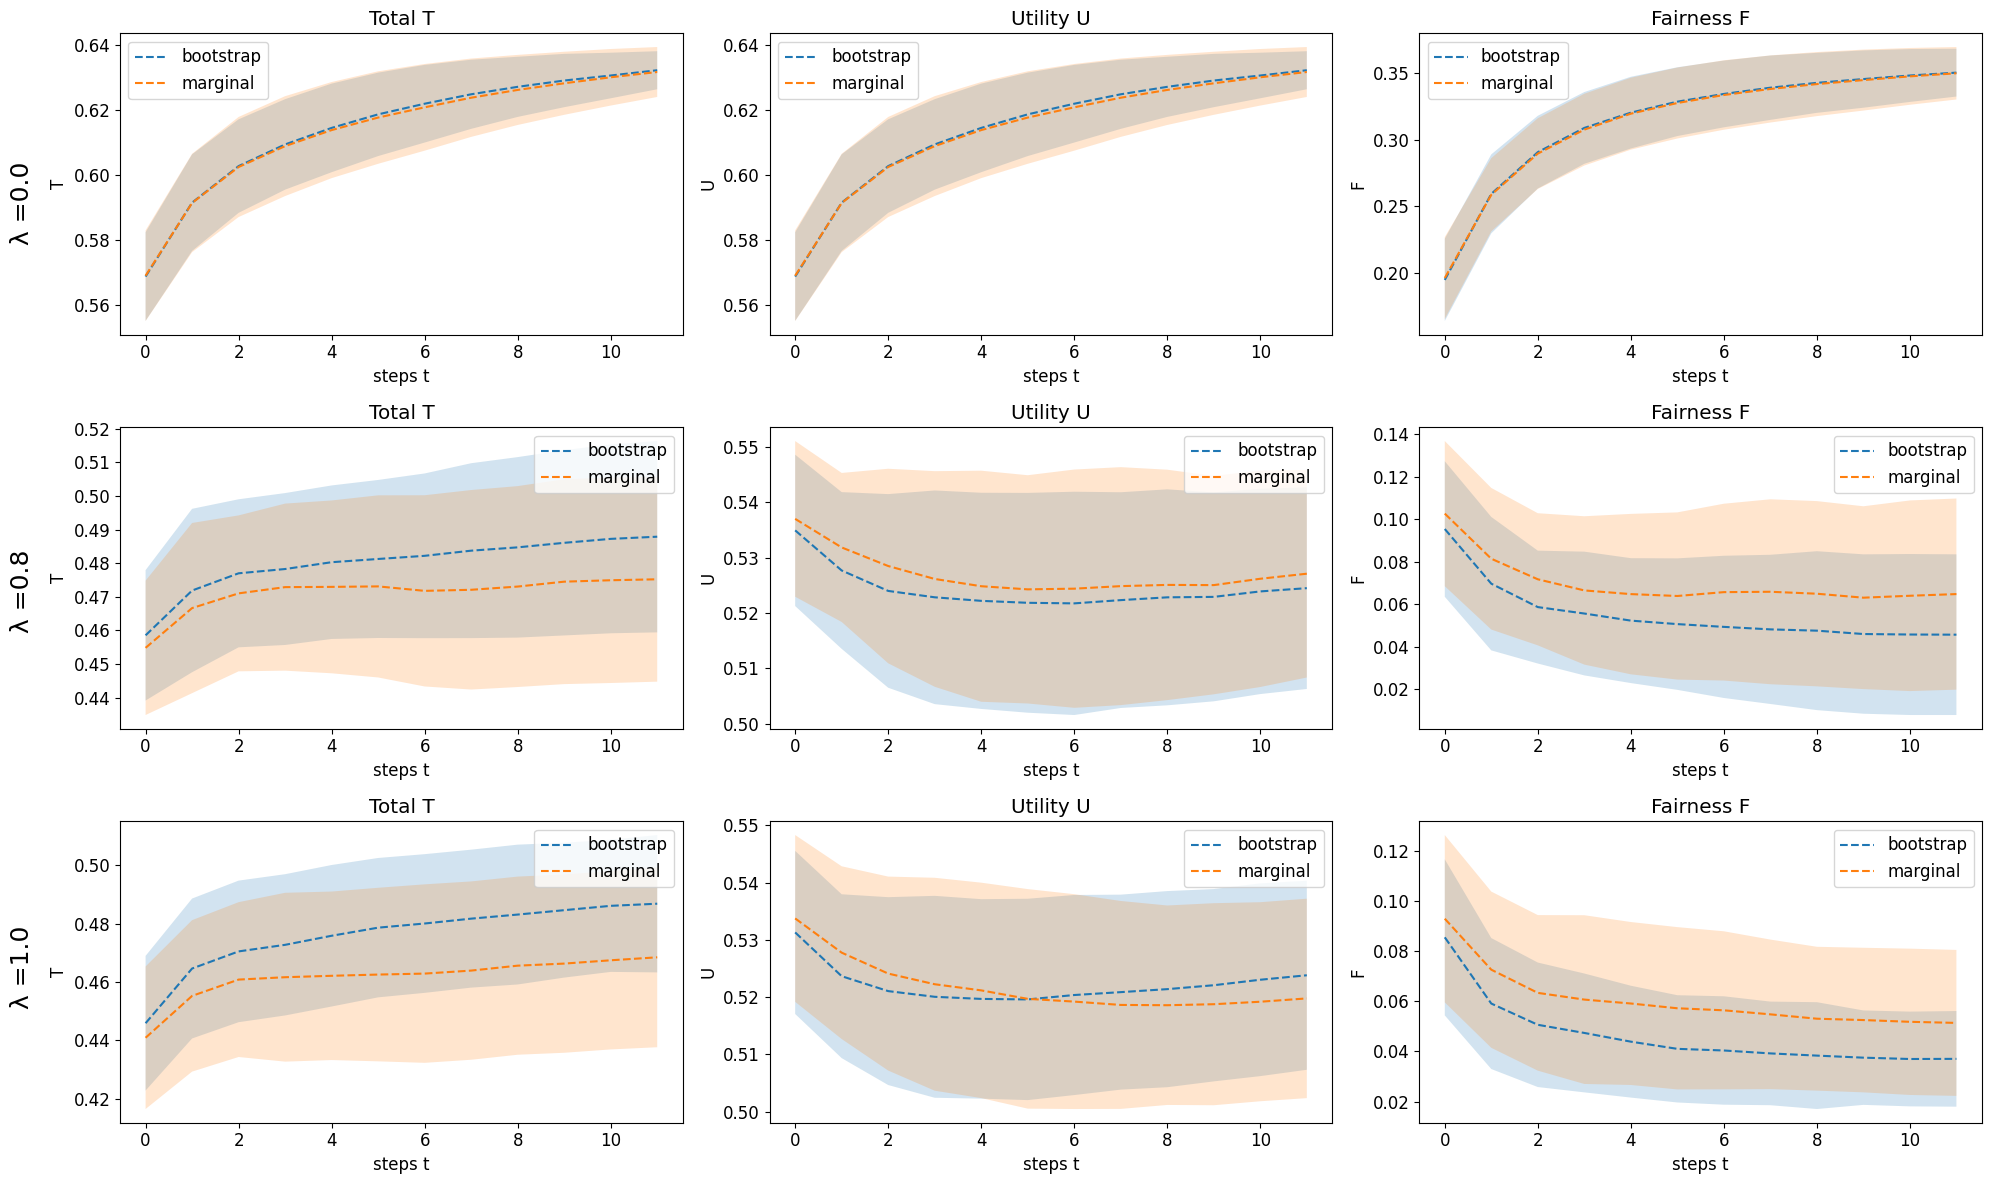

In [51]:
subplots_comparison_paper(ls=ls, losses_list=l_results, save_path=results_path)

In [46]:
def subplots_comparison_paper(ls, losses_list, save_path):
    fig, axes = plt.subplots(3, 3, figsize=(20, 12))
    fig.text(0.005, 1/6 - 0.01, f'λ ={ls[2]}', rotation='vertical', fontsize = 18)
    fig.text(0.005, 1/3 + 1/6 - 0.03, f'λ ={ls[1]}', rotation='vertical', fontsize = 18)
    fig.text(0.005, 2/3 + 1/6 - 0.04, f'λ ={ls[0]}', rotation='vertical', fontsize = 18)
    for l, ax, losses in zip(ls, axes, losses_list):
        # plot total
        x = range(losses[0]["bootstrap_mean"].shape[0])
        ax[0].plot(x, losses[0]["bootstrap_mean"],"--", label = "bootstrap")
        ax[0].fill_between(x = x,
                         y1 = (losses[0]["bootstrap_mean"]-losses[0]["bootstrap_std"]).values,
                         y2 = (losses[0]["bootstrap_mean"]+losses[0]["bootstrap_std"]).values,
                         alpha = 0.2)
        ax[0].plot(x, losses[0]["marginal_mean"],"--", label = "marginal")
        ax[0].fill_between(x = x,
                         y1 = (losses[0]["marginal_mean"]-losses[0]["marginal_std"]).values,
                         y2 = (losses[0]["marginal_mean"]+losses[0]["marginal_std"]).values,
                         alpha = 0.2)
        ax[0].set_title("Total T")
        ax[0].set(xlabel='steps t', ylabel=f'T')
        ax[0].legend()

        # plot utility
        ax[1].plot(x, losses[1]["bootstrap_mean"],"--", label = "bootstrap")
        ax[1].fill_between(x = x,
                         y1 = (losses[1]["bootstrap_mean"]-losses[1]["bootstrap_std"]).values,
                         y2 = (losses[1]["bootstrap_mean"]+losses[1]["bootstrap_std"]).values,
                         alpha = 0.2)
        ax[1].plot(x, losses[1]["marginal_mean"],"--", label = "marginal")
        ax[1].fill_between(x = x,
                         y1 = (losses[1]["marginal_mean"]-losses[1]["marginal_std"]).values,
                         y2 = (losses[1]["marginal_mean"]+losses[1]["marginal_std"]).values,
                         alpha = 0.2)
        ax[1].set_title("Utility U")
        ax[1].set(xlabel='steps t', ylabel='U')
        ax[1].legend()

        # fairness
        ax[2].plot(x, losses[2]["bootstrap_mean"],"--", label = "bootstrap")
        ax[2].fill_between(x =x,
                         y1 = (losses[2]["bootstrap_mean"]-losses[2]["bootstrap_std"]).values,
                         y2 = (losses[2]["bootstrap_mean"]+losses[2]["bootstrap_std"]).values,
                         alpha = 0.2)
        ax[2].plot(x, losses[2]["marginal_mean"],"--", label = "marginal")
        ax[2].fill_between(x = x,
                         y1 = (losses[2]["marginal_mean"]-losses[2]["marginal_std"]).values,
                         y2 = (losses[2]["marginal_mean"]+losses[2]["marginal_std"]).values,
                         alpha = 0.2)
        ax[2].set_title("Fairness F")
        ax[2].set(xlabel='steps t', ylabel='F')
        ax[2].legend()
#         ax.suptitle(f"Comparison results λ = {l}")
#     fig.suptitle(f"Comparison results for different λ parameter")
    plt.tight_layout()
    fig.subplots_adjust(left=0.06)
    fig.savefig(save_path + f"/plots/comparison_subplots_paper.png")
    plt.show()
    plt.close()

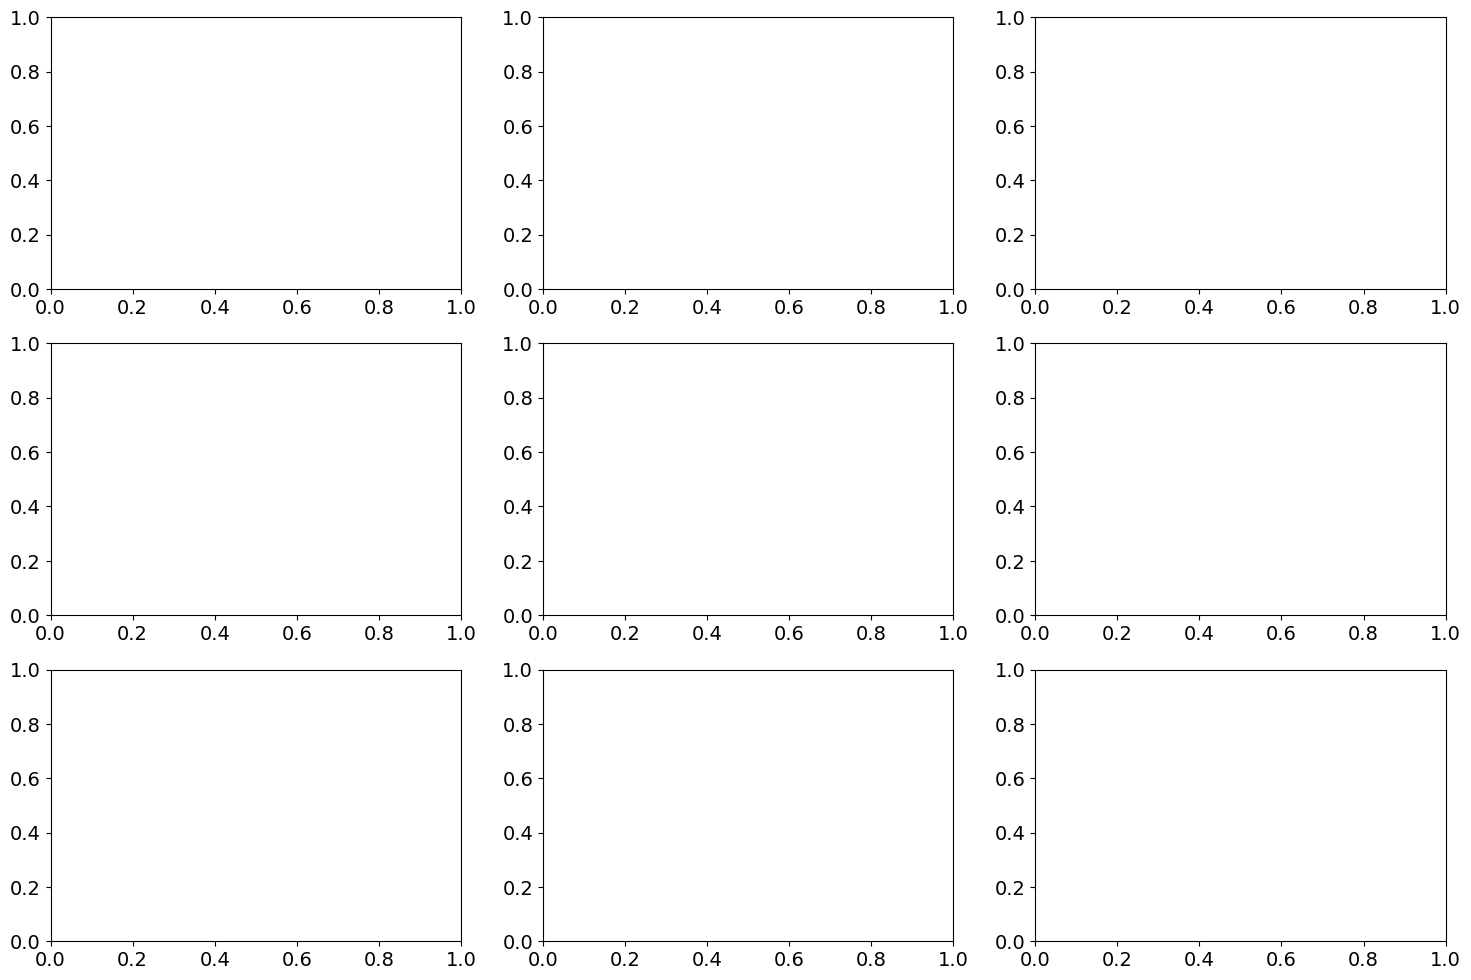

In [62]:
ls = [0.0, 0.4, 0.5]
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

In [39]:
axes

array([[<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

In [43]:
for l, ax, losses in zip(ls, axes, l_results):
    print(l)
    print(ax)


0.0
[<AxesSubplot: > <AxesSubplot: > <AxesSubplot: >]
0.4
[<AxesSubplot: > <AxesSubplot: > <AxesSubplot: >]
0.5
[<AxesSubplot: > <AxesSubplot: > <AxesSubplot: >]


In [45]:
losses[0]

,bootstrap_mean,bootstrap_std,marginal_mean,marginal_std
0,0.498035,0.011488,0.494452,0.002819
1,0.525584,0.001784,0.523854,0.000571
2,0.528064,0.000488,0.529366,0.000120
3,0.528996,0.000476,0.531090,0.000055
4,0.529731,0.000971,0.530989,0.000032
5,0.529490,0.000789,0.530968,0.000037
6,0.530085,0.000913,0.530823,0.000071
7,0.530178,0.000853,0.530696,0.000028
8,0.530311,0.000798,0.530507,0.000036
9,0.529781,0.000465,0.529595,0.000010
